# Insurance Database Creation
**Module :** Data Mining

**Author :** Taissir Boukrouba

**Student ID :** 22084758


This database includes 3 tables which are related to AutoInsurance :
- **Customer Information Table** : this includes customer details
- **Car Information Table** : this includes car details
- **Insurance Contract Table :** this includes infomrmation about the insurance contract

## Initialisations

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
count = 1000

## Customer Information

In [86]:
#id
customer_id = []
while len(customer_id) < count:
    customer_id = np.unique(np.random.randint(23000000, 24000000, count))

customer_id = customer_id.astype(int)

#age
age = np.random.randint(20, 90, count)

#phone number
phone_numbers = np.random.randint(10000000000,70000000000,count)

#customer type
customers = ["Individual","Company"]
customer_type = np.random.choice(customers, count,p=[0.95,0.05])

#customer class
customer_class = np.random.randint(1,12,count)

customer_cols = [customer_id,age,phone_numbers,customer_type,customer_class]
customer_labels = ["customer_ID","Age","Phone","Customer_Type","Customer_Class"]

## Car Information

In [87]:
# car ID :
car_id = []
while len(car_id) < count:
    car_id = np.unique(np.random.randint(1000000, 9000000, count))
car_id = car_id.astype(int)

#brand
brands = np.loadtxt('/content/Car Brands.csv', delimiter=',',unpack=True,
                    dtype=str)

#fuel type
fuels = ["Petrol","Diesel","Electric","Hybrid"]
fuel_type = np.random.choice(fuels, count, p=[0.4, 0.3, 0.2, 0.1])

#car type
types_list = ["Sedan","SUV","Hatchback","Crossover","Minivan","Pickup Truck",
                          "Coupe","Convertible","Sports Car","Electric Car (EV)"]
car_types = np.random.choice(types_list,count,p=[0.25,0.2,0.1,0.2,0.05,0.1,0.05,0.02,0.02,0.01])

In [88]:
# vehicule power
def vehicule_power(car_type):
    """
    Get a random vehicle power value based on the provided car type.

    Parameters:
    - car_type (str): Type of the car.

    Returns:
    - power (int or None): Randomly generated vehicle power value.
      Returns None if the provided car type is not in the switch dictionary.
    """
    values = {
        "Sports Car": np.random.randint(200,500),
        "Electric Car (EV)": np.random.randint(50,500),
        "Convertible": np.random.randint(120,400),
        "SUV": np.random.randint(100,400),
        "Pickup Truck": np.random.randint(150,450),
        "Minivan": np.random.randint(150,300),
        "Crossover": np.random.randint(100,350),
        "Coupe": np.random.randint(100,400),
        "Sedan": np.random.randint(80,400),
        "Hatchback": np.random.randint(80,300),
    }

    # Assigning the values to each car type
    return values.get(car_type)


vehicule_power = np.array([vehicule_power(car_type) for car_type in car_types])

In [89]:
# car ages (right skewed )
num_cars = 1000
shape_parameter = 5  # for skewness
scale_parameter = 1.5  # for the spread
np.random.seed(42)
car_age = np.random.gamma(shape_parameter, scale_parameter, num_cars)

In [90]:
# mileage
noise = np.random.normal(scale=200, size=count)
mileage_slope = 1000
base_mileage = 5000

mileage = (10000 * car_age + 5000) + -150 * car_age**2 + noise
min(mileage)

13470.525666935548

In [91]:
# car prices
np.random.seed(0)
error = np.random.normal(500, 5000, count)
b = 7000
a1 = -0.3
a2 = -10
a3 = 500

car_price = (b +(a1 * mileage) + (a2 * car_age) + (a3 * vehicule_power))+ error

In [92]:
mileage = mileage.astype(int)
car_age = car_age.astype(int)
car_price = np.round(car_price,2)
car_cols = [car_id,customer_id,brands,fuel_type,car_types,vehicule_power,car_age,mileage,car_price]
car_labels = ["Car_ID","Customer_ID","Car_Brand","Fuel_Type","Car_Type","Vehicule_Power","Car_Age","Mileage","Car_Price"]

## Contract Information

In [106]:
contract_id = []
while len(contract_id) < count:
    contract_id = np.unique(np.random.randint(240100000, 241200000, count))
contract_id = contract_id.astype(int)

# Contract Length
lengths = list(range(6,61,6))
contract_length = np.random.choice(lengths,count,[0.05, 0.1, 0.15, 0.2, 0.15, 0.1, 0.08, 0.07, 0.05, 0.05])

# Insurance Type
insurance_types_list = ["Liability Insurance","Collision Coverage",
                        "Comprehensive Coverage","Uninsured/Underinsured Motorist",
                        "Personal Injury Protection (PIP)","Gap Insurance",
                        "Custom Parts and Equipment (CPE)","Classic Car Insurance"]

insurance_type = np.random.choice(insurance_types_list,count,p=[0.23, 0.18, 0.16, 0.12, 0.13, 0.08, 0.05, 0.05])


def insurance_cost(insurance_type):
    """
    Calculate the insurance cost based on the provided insurance type.

    Parameters:
    - insurance_type (str): Type of insurance coverage.

    Returns:
    - cost (float or None): The calculated insurance cost as a percentage.
      Returns None if the provided insurance type is not in the switch
      dictionary.
    """
    values = {
        "Liability Insurance": 0.15,
        "Collision Coverage": 0.25,
        "Comprehensive Coverage": 0.15,
        "Uninsured/Underinsured Motorist": 0.1,
        "Personal Injury Protection (PIP)": 0.15,
        "Gap Insurance": 0.05,
        "Custom Parts and Equipment (CPE)": 0.03,
        "Classic Car Insurance": 0.02,
    }


    return values.get(insurance_type)


# Contract_start_date
contract_year = np.random.randint(2020, 2024, count)
contract_month = np.random.randint(1, 13, count)
contract_day = np.random.randint(1, 29, count)
Contract_start_date = [f'{contract_year[i]}-{str(contract_month[i]).zfill(2)}-'
                     f'{str(contract_day[i]).zfill(2)}' for i in range(count)]

insurance_cost = np.array([insurance_cost(insurance) for insurance in insurance_type])
insurance_cost

#premuim
yearly_length = (1/12* contract_length)
premuim = np.round(insurance_cost*car_price*yearly_length + 2*age,2)

contract_cols = [contract_id,customer_id,car_id,contract_length,insurance_type,
                 insurance_cost,premuim,Contract_start_date]
contract_labels = ["Contract_ID","Customer_ID","Car_ID","Contract_length","Insurance_type",
                   "Cost_Per_Insurance_Type","Annual_premuim",
                   "Contract_Start_date"]

In [107]:
# creating dataframes :
def make_frame(columns,labels) :
  """
    Create a DataFrame from given columns and labels.

    Parameters:
    - columns (list of lists): Data for each column.
    - labels (list): Column labels.

    Returns:
    - df (DataFrame): Created DataFrame.
  """
  data = dict(zip(labels, columns))
  df = pd.DataFrame(data)
  return df

beta_customer_df = make_frame(customer_cols,customer_labels)
beta_car_df = make_frame(car_cols,car_labels)
beta_contract_df = make_frame(contract_cols,contract_labels)

In [108]:
beta_contract_df.loc[0,"Customer_ID"]

23000943

In [109]:
beta_contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Contract_ID              1000 non-null   int64  
 1   Customer_ID              1000 non-null   int64  
 2   Car_ID                   1000 non-null   int64  
 3   Contract_length          1000 non-null   int64  
 4   Insurance_type           1000 non-null   object 
 5   Cost_Per_Insurance_Type  1000 non-null   float64
 6   Annual_premuim           1000 non-null   float64
 7   Contract_Start_date      1000 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [110]:
beta_contract_df.columns

Index(['Contract_ID', 'Customer_ID', 'Car_ID', 'Contract_length',
       'Insurance_type', 'Cost_Per_Insurance_Type', 'Annual_premuim',
       'Contract_Start_date'],
      dtype='object')

## Adding missing values

In [111]:
def add_missing_values(df,percentage) :
    """
    Adds missing values to a DataFrame randomly.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - percentage (float): The percentage of missing values to add to each
    column.

    Returns:
    pandas.DataFrame: DataFrame with added missing values.

    """

    np.random.seed(0)
    num_missing_values = int(np.round(df.shape[0] * percentage))

    for col in df.columns :
      # "ID" col specification
      if 'ID' not in col:
        random_indices = np.random.randint(0, df.shape[0], num_missing_values)
        for i in random_indices :
          df.loc[i,col] = np.nan
    return df


customer_df = add_missing_values(beta_customer_df,0.2)
car_df = add_missing_values(beta_car_df,0.3)
contract_df = add_missing_values(beta_contract_df,0.25)

In [112]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Contract_ID              1000 non-null   int64  
 1   Customer_ID              1000 non-null   int64  
 2   Car_ID                   1000 non-null   int64  
 3   Contract_length          772 non-null    float64
 4   Insurance_type           776 non-null    object 
 5   Cost_Per_Insurance_Type  774 non-null    float64
 6   Annual_premuim           776 non-null    float64
 7   Contract_Start_date      781 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [100]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car_ID          1000 non-null   int64  
 1   Customer_ID     1000 non-null   int64  
 2   Car_Brand       735 non-null    object 
 3   Fuel_Type       740 non-null    object 
 4   Car_Type        740 non-null    object 
 5   Vehicule_Power  740 non-null    float64
 6   Car_Age         732 non-null    float64
 7   Mileage         742 non-null    float64
 8   Car_Price       754 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 70.4+ KB


In [101]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_ID     1000 non-null   int64  
 1   Age             816 non-null    float64
 2   Phone           814 non-null    float64
 3   Customer_Type   817 non-null    object 
 4   Customer_Class  818 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 39.2+ KB


## Exporting Tables

In [113]:
customer_df.to_csv("customer_df.csv",index=False)
car_df.to_csv("car_df.csv",index=False)
contract_df.to_csv("contract_df.csv",index=False)

## [BONUS] Investigating Correlation Between Features :

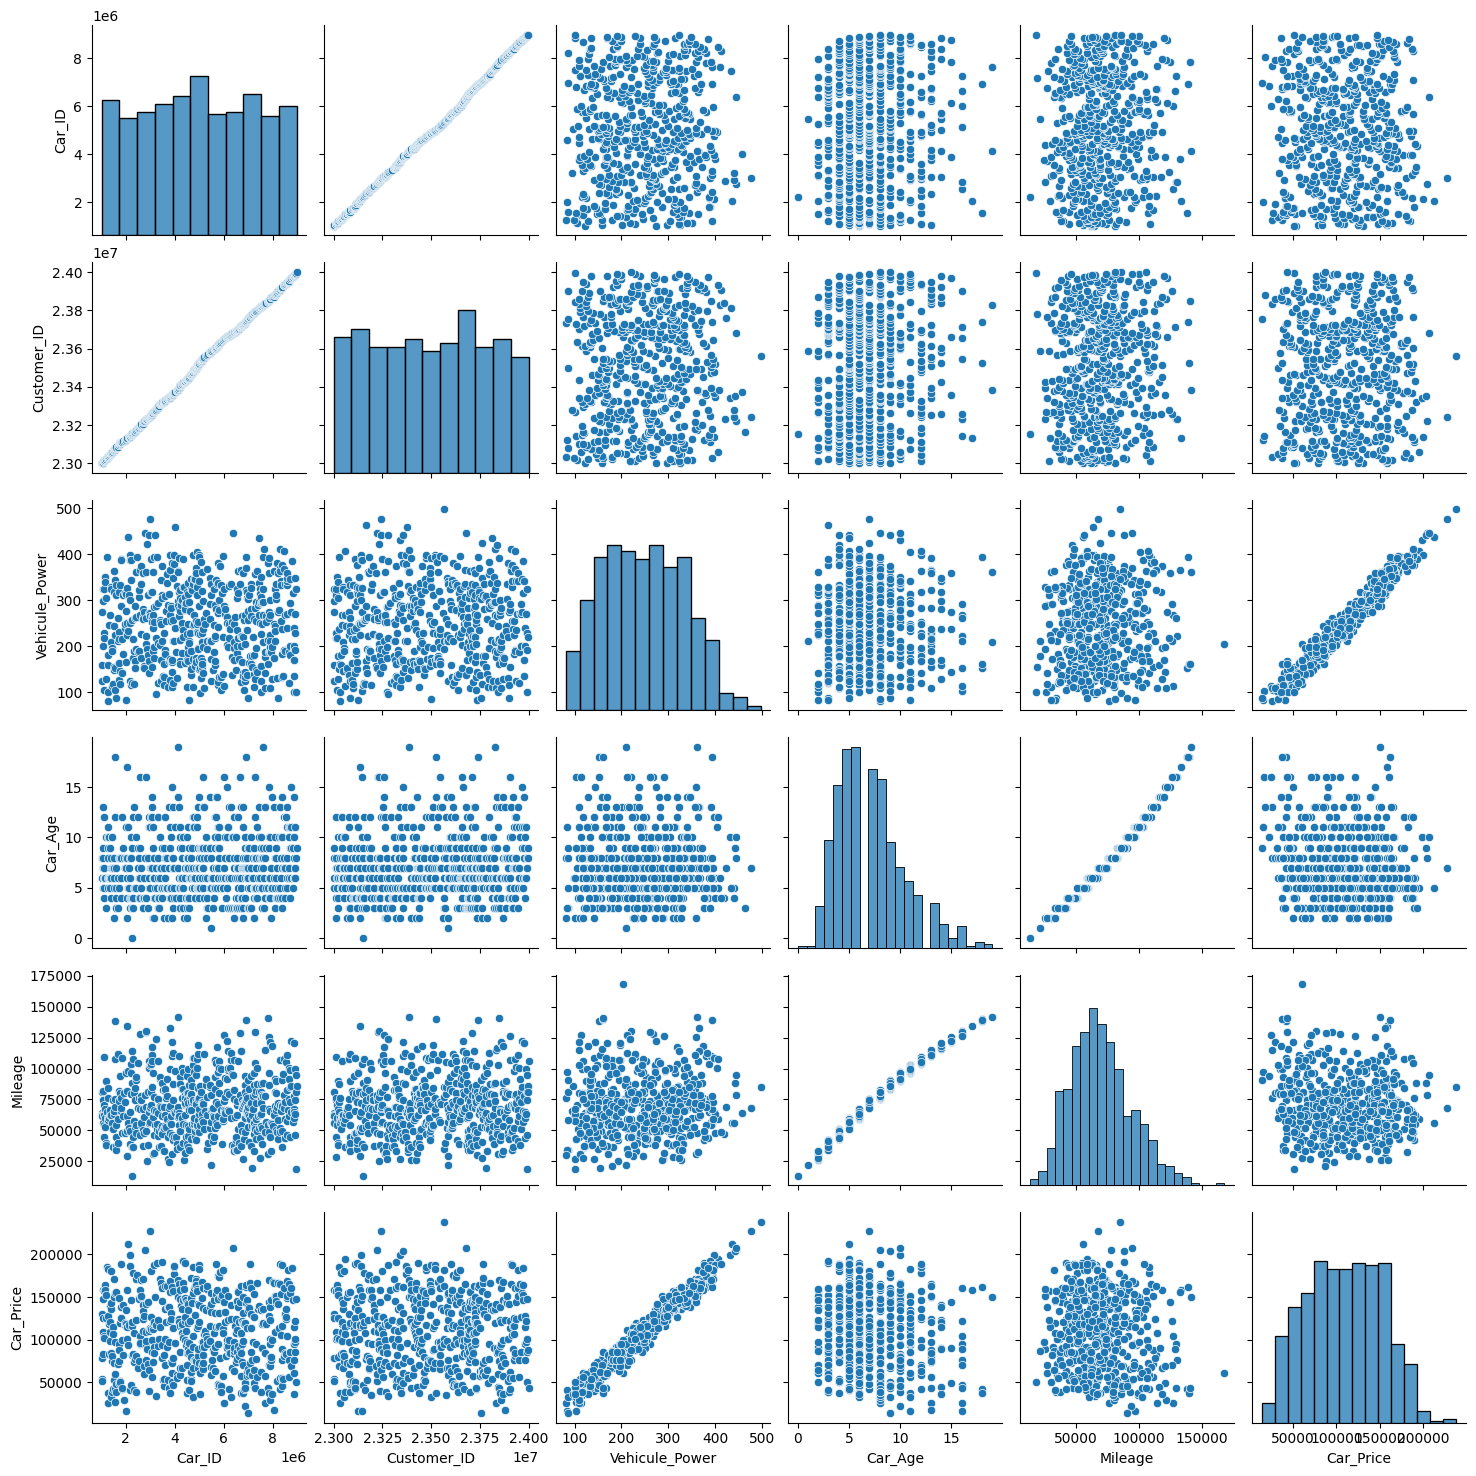

In [48]:
import seaborn as sns

sns.pairplot(car_df);

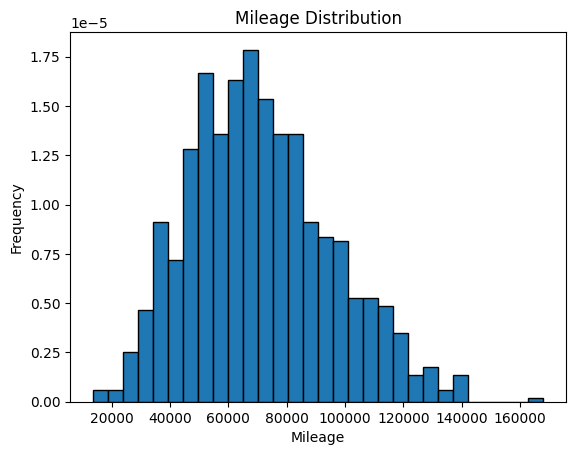

In [73]:
plt.hist(mileage, bins=30, edgecolor='black', density=True)
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.title("Mileage Distribution");

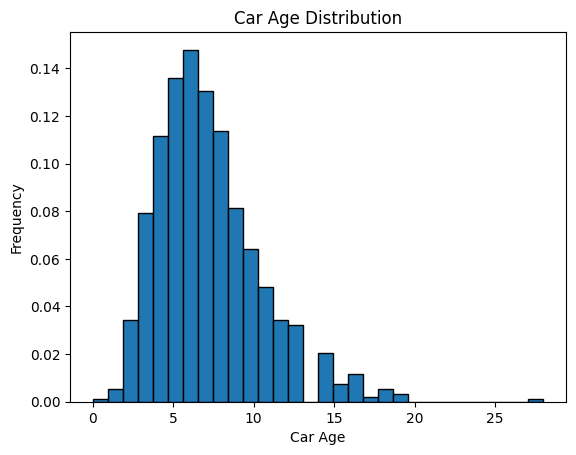

In [74]:
plt.hist(car_age, bins=30, edgecolor='black', density=True)
plt.xlabel("Car Age")
plt.ylabel("Frequency")
plt.title("Car Age Distribution");